In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Reading the csv files of person 2
df1=pd.read_csv("D:\PPG Dataset\Low_MWL\Low_MWL\p2l.csv")
df1

,Trial 1:0back,Trial 6:0back
0,32.862,34.755
1,32.839,34.676
2,32.838,34.597
3,32.861,34.517
4,32.910,34.436
...,...,...
76795,38.499,33.383
76796,38.439,33.416
76797,38.381,33.467
76798,38.326,33.538


In [30]:
df2=pd.read_csv("D:\PPG Dataset\High_MWL\High_MWL\p2h.csv")
df2

,Trial 3:3back,Trial 5:3back
0,35.228,35.968
1,35.194,35.932
2,35.158,35.901
3,35.120,35.875
4,35.080,35.853
...,...,...
76795,34.093,35.634
76796,34.097,35.599
76797,34.105,35.562
76798,34.118,35.525


Text(0.5, 1.0, 'PPG Signal 1')

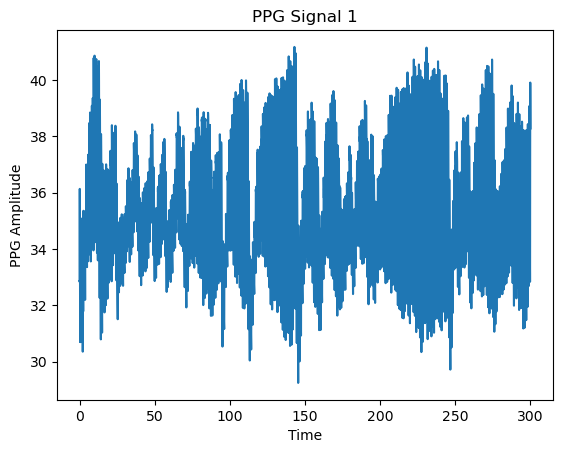

In [31]:
ppg_1=df1['Trial 1:0back']     
sampling_rate=256
time=np.arange(len(ppg_1))/sampling_rate
plt.plot(time,ppg_1)
plt.xlabel('Time')
plt.ylabel('PPG Amplitude')
plt.title('PPG Signal 1')

Text(0.5, 1.0, 'PPG Signal 2')

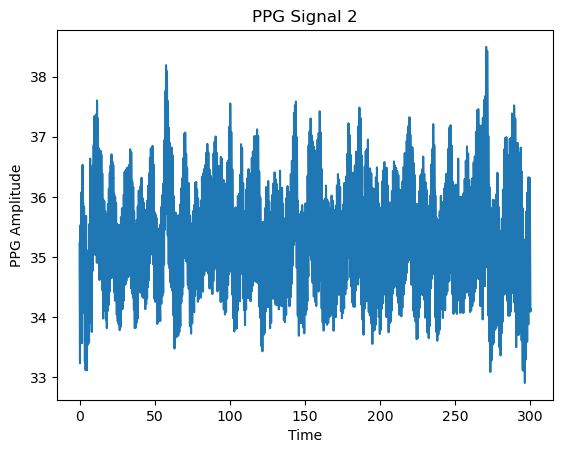

In [32]:
ppg_2=df2['Trial 3:3back']
plt.plot(time,ppg_2)
plt.xlabel('Time')
plt.ylabel('PPG Amplitude')
plt.title('PPG Signal 2')

In [33]:

!pip install EMD-signal

In [34]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert
from PyEMD import EMD
pd.options.display.precision = 10
from os import listdir
from scipy.stats import skew

In [35]:
print(df1.head(10))

# Selecting column 1 of dataframe along with 768 rows
col1=df1['Trial 1:0back'].iloc[0:768]
S1 = col1.values
t=np.arange(len(col1))/sampling_rate

print('S shape: ', S1.shape)
print('t shape: ', t.shape)

   Trial 1:0back  Trial 6:0back
0         32.862         34.755
1         32.839         34.676
2         32.838         34.597
3         32.861         34.517
4         32.910         34.436
5         32.985         34.356
6         33.086         34.275
7         33.211         34.195
8         33.358         34.115
9         33.523         34.037
S shape:  (768,)
t shape:  (768,)


In [36]:
config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
emd = EMD(**config)
imfs = emd(S1, max_imf=7)
print('imfs = ' + f'{imfs.shape[0]:4d}')

imfs =    5


In [37]:
dt = t[0] - t[1]
print(dt)

-0.00390625


In [38]:
def instant_phase(imfs):
    """Extract analytical signal through Hilbert Transform."""
    analytic_signal = hilbert(imfs)  # Apply Hilbert transform to each row
    # Compute angle between img and real
    phase = np.unwrap(np.angle(analytic_signal))
    return phase
# Extract instantaneous phases and frequencies using Hilbert transform
instant_phases = instant_phase(imfs)
instant_freqs = np.diff(instant_phases)/(2*np.pi*dt)


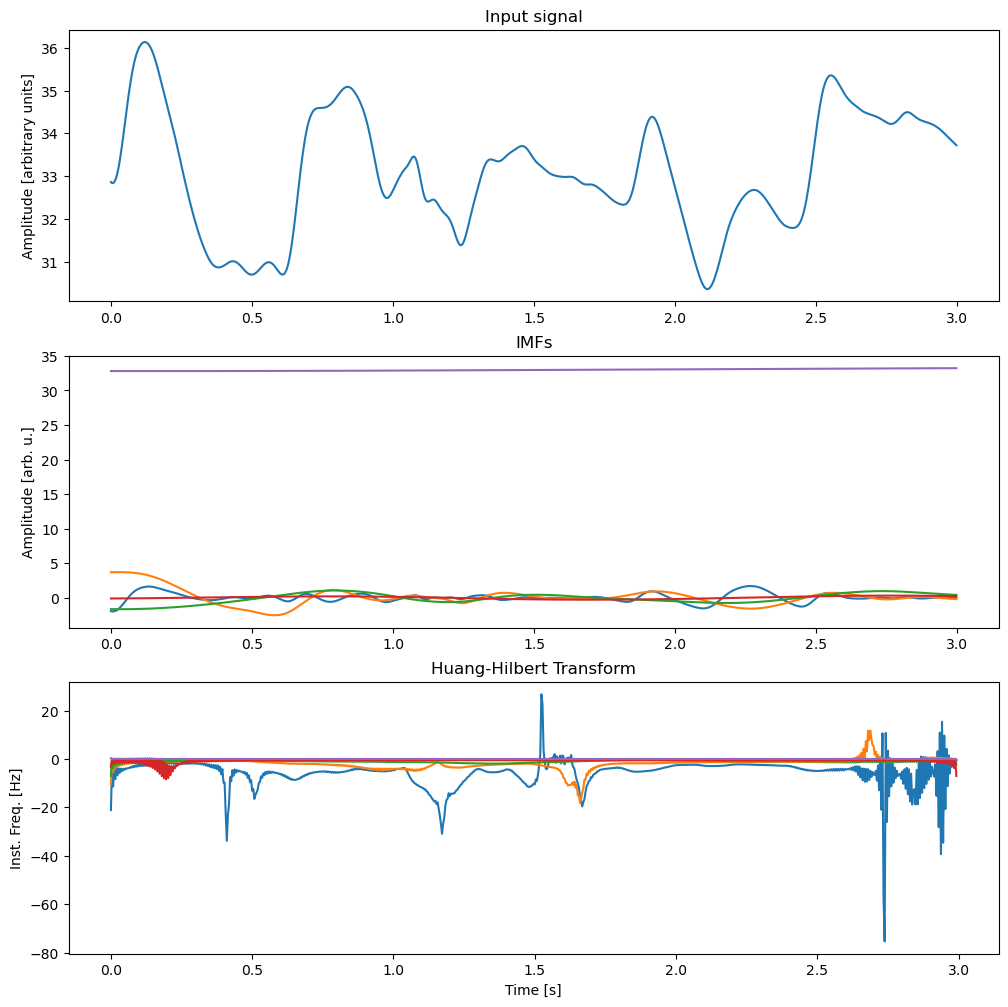

In [39]:
fig, axes = plt.subplots(3, figsize=(12, 12))

# The top panel shows the input signal
ax = axes[0]
ax.plot(t, S1)
ax.set_ylabel("Amplitude [arbitrary units]")
ax.set_title("Input signal")

# The middle panel shows all IMFs
ax = axes[1]
for num, imf in enumerate(imfs):
    ax.plot(t, imf, label='IMF %s' %( num + 1 ))

ax.set_ylabel("Amplitude [arb. u.]")
ax.set_title("IMFs")

# The bottom panel shows all instantaneous frequencies
ax = axes[2]
for num, instant_freq in enumerate(instant_freqs):
    ax.plot(t[:-1], instant_freq, label='IMF %s'%(num+1))

ax.set_xlabel("Time [s]")
ax.set_ylabel("Inst. Freq. [Hz]")
ax.set_title("Huang-Hilbert Transform")

plt.show()

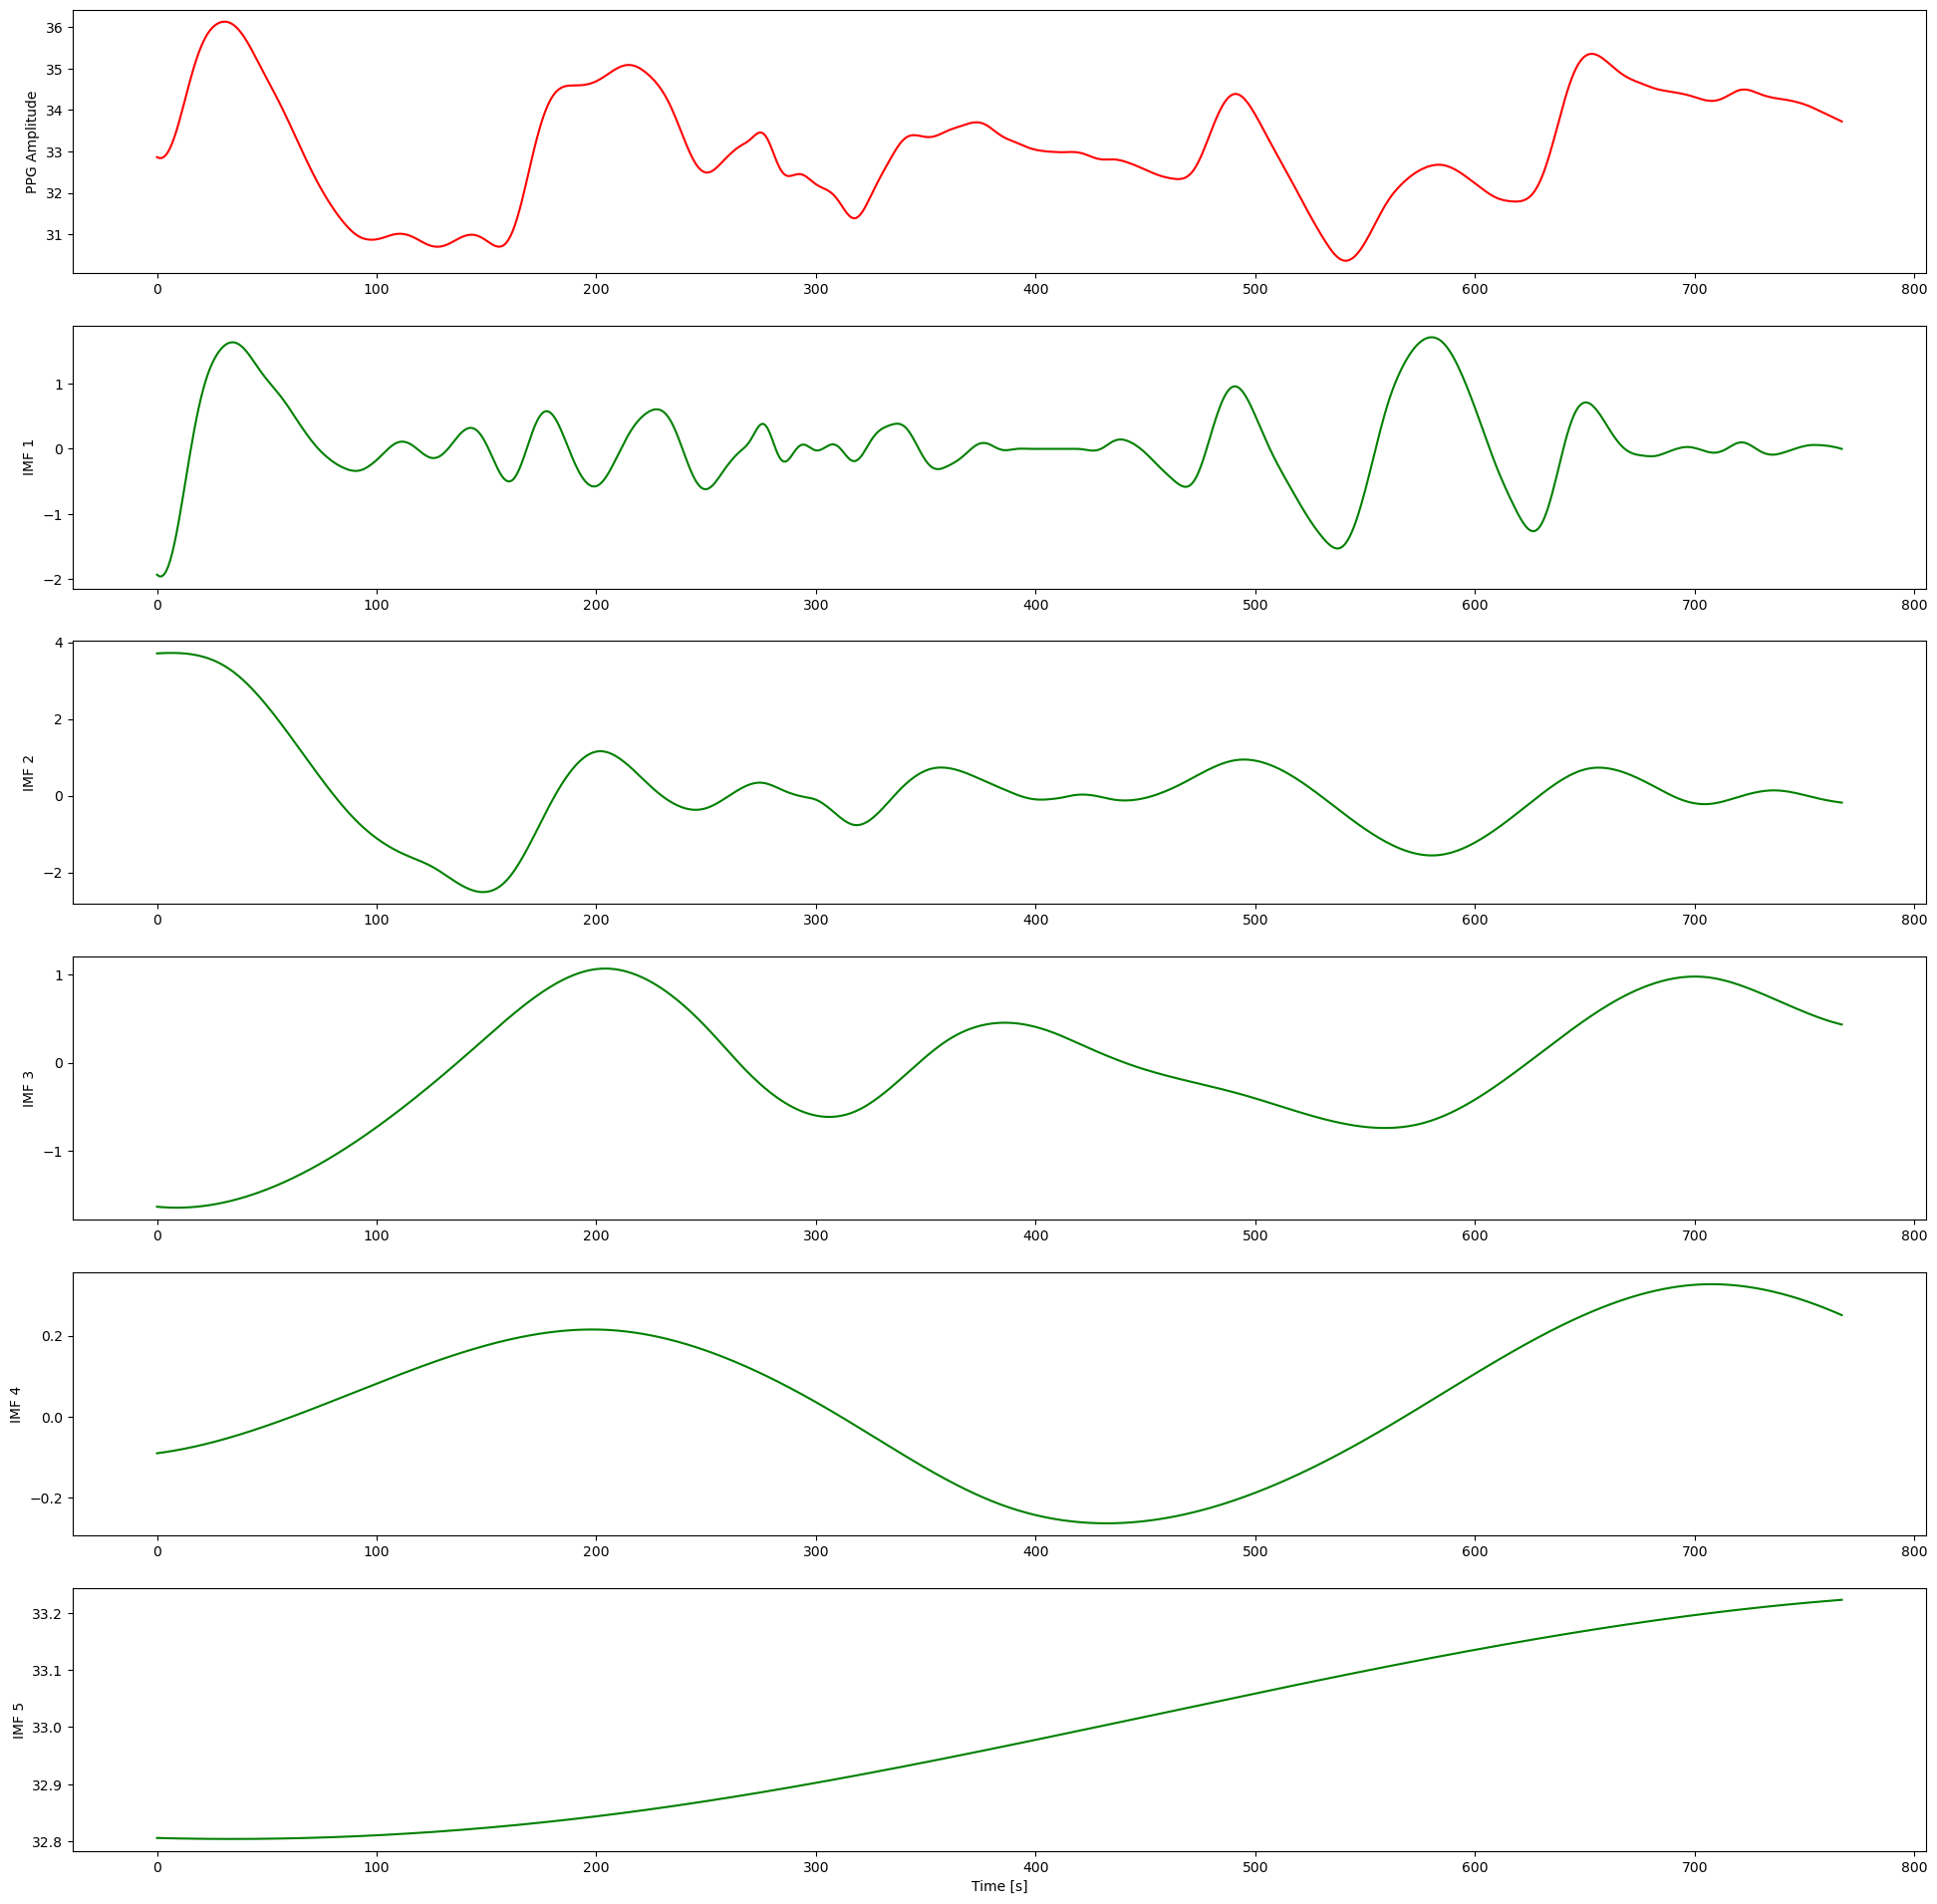

In [40]:
nIMFs = imfs.shape[0]
plt.figure(figsize=(24,24))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(S1, 'r')
plt.ylabel('PPG Amplitude')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(imfs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.show()

In [41]:
print(df2.head(10))

# Selecting column 1 of dataframe along with 768 rows
col1=df2['Trial 3:3back'].iloc[0:768]
S2 = col1.values
t=np.arange(len(col1))/sampling_rate

print('S shape: ', S2.shape)
print('t shape: ', t.shape)

   Trial 3:3back  Trial 5:3back
0         35.228         35.968
1         35.194         35.932
2         35.158         35.901
3         35.120         35.875
4         35.080         35.853
5         35.038         35.837
6         34.995         35.826
7         34.952         35.819
8         34.909         35.816
9         34.866         35.818
S shape:  (768,)
t shape:  (768,)


In [42]:
config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
emd = EMD(**config)
imfs = emd(S2, max_imf=7)
print('imfs = ' + f'{imfs.shape[0]:4d}')

imfs =    4


In [43]:
dt = t[0] - t[1]
print(dt)

-0.00390625


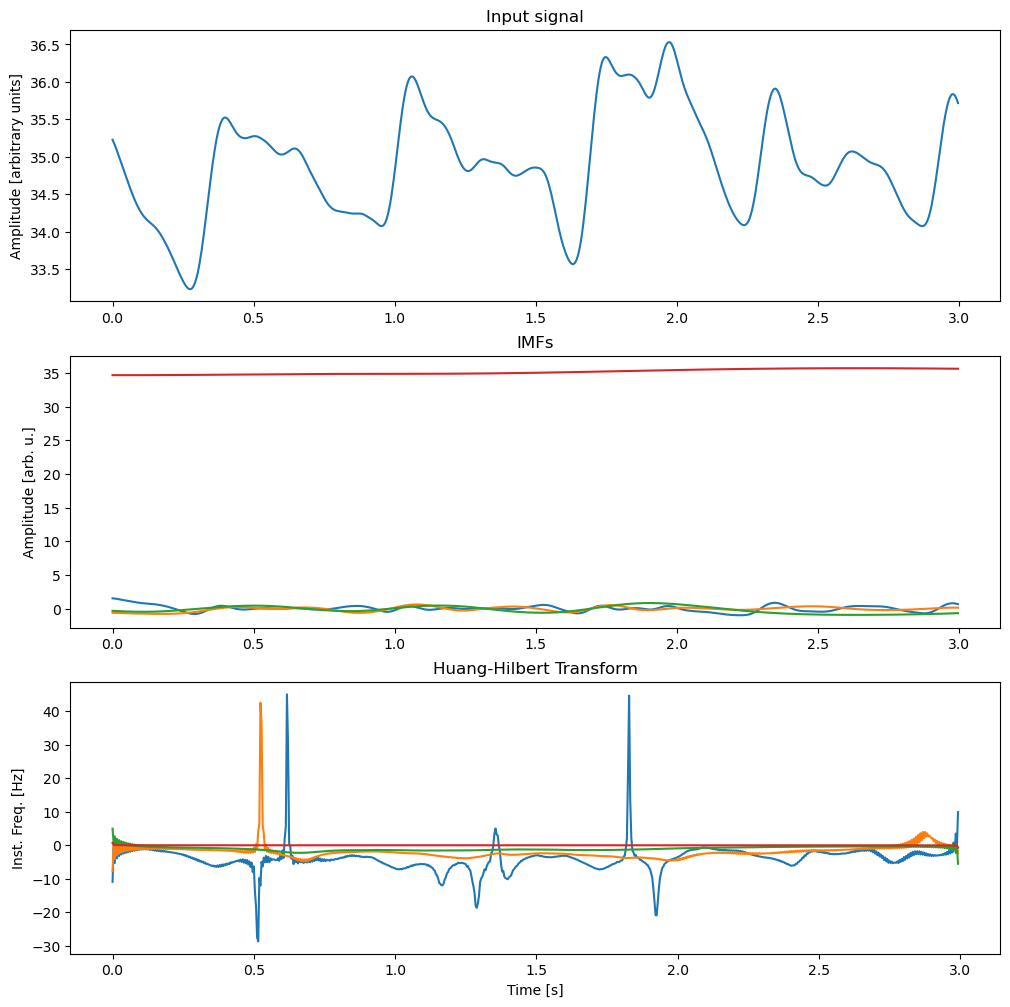

In [44]:
def instant_phase(imfs):
    """Extract analytical signal through Hilbert Transform."""
    analytic_signal = hilbert(imfs)  # Apply Hilbert transform to each row
    # Compute angle between img and real
    phase = np.unwrap(np.angle(analytic_signal))
    return phase

# Extract instantaneous phases and frequencies using Hilbert transform
instant_phases = instant_phase(imfs)
instant_freqs = np.diff(instant_phases)/(2*np.pi*dt)

# Create a figure consisting of 3 panels
fig, axes = plt.subplots(3, figsize=(12, 12))

# The input signal
ax = axes[0]
ax.plot(t, S2)
ax.set_ylabel("Amplitude [arbitrary units]")
ax.set_title("Input signal")

# all IMFs
ax = axes[1]
for num, imf in enumerate(imfs):
    ax.plot(t, imf, label='IMF %s' %( num + 1 ))
ax.set_ylabel("Amplitude [arb. u.]")
ax.set_title("IMFs")

# The instantaneous frequencies
ax = axes[2]
for num, instant_freq in enumerate(instant_freqs):
    ax.plot(t[:-1], instant_freq, label='IMF %s'%(num+1))

ax.set_xlabel("Time [s]")
ax.set_ylabel("Inst. Freq. [Hz]")
ax.set_title("Huang-Hilbert Transform")
plt.show()



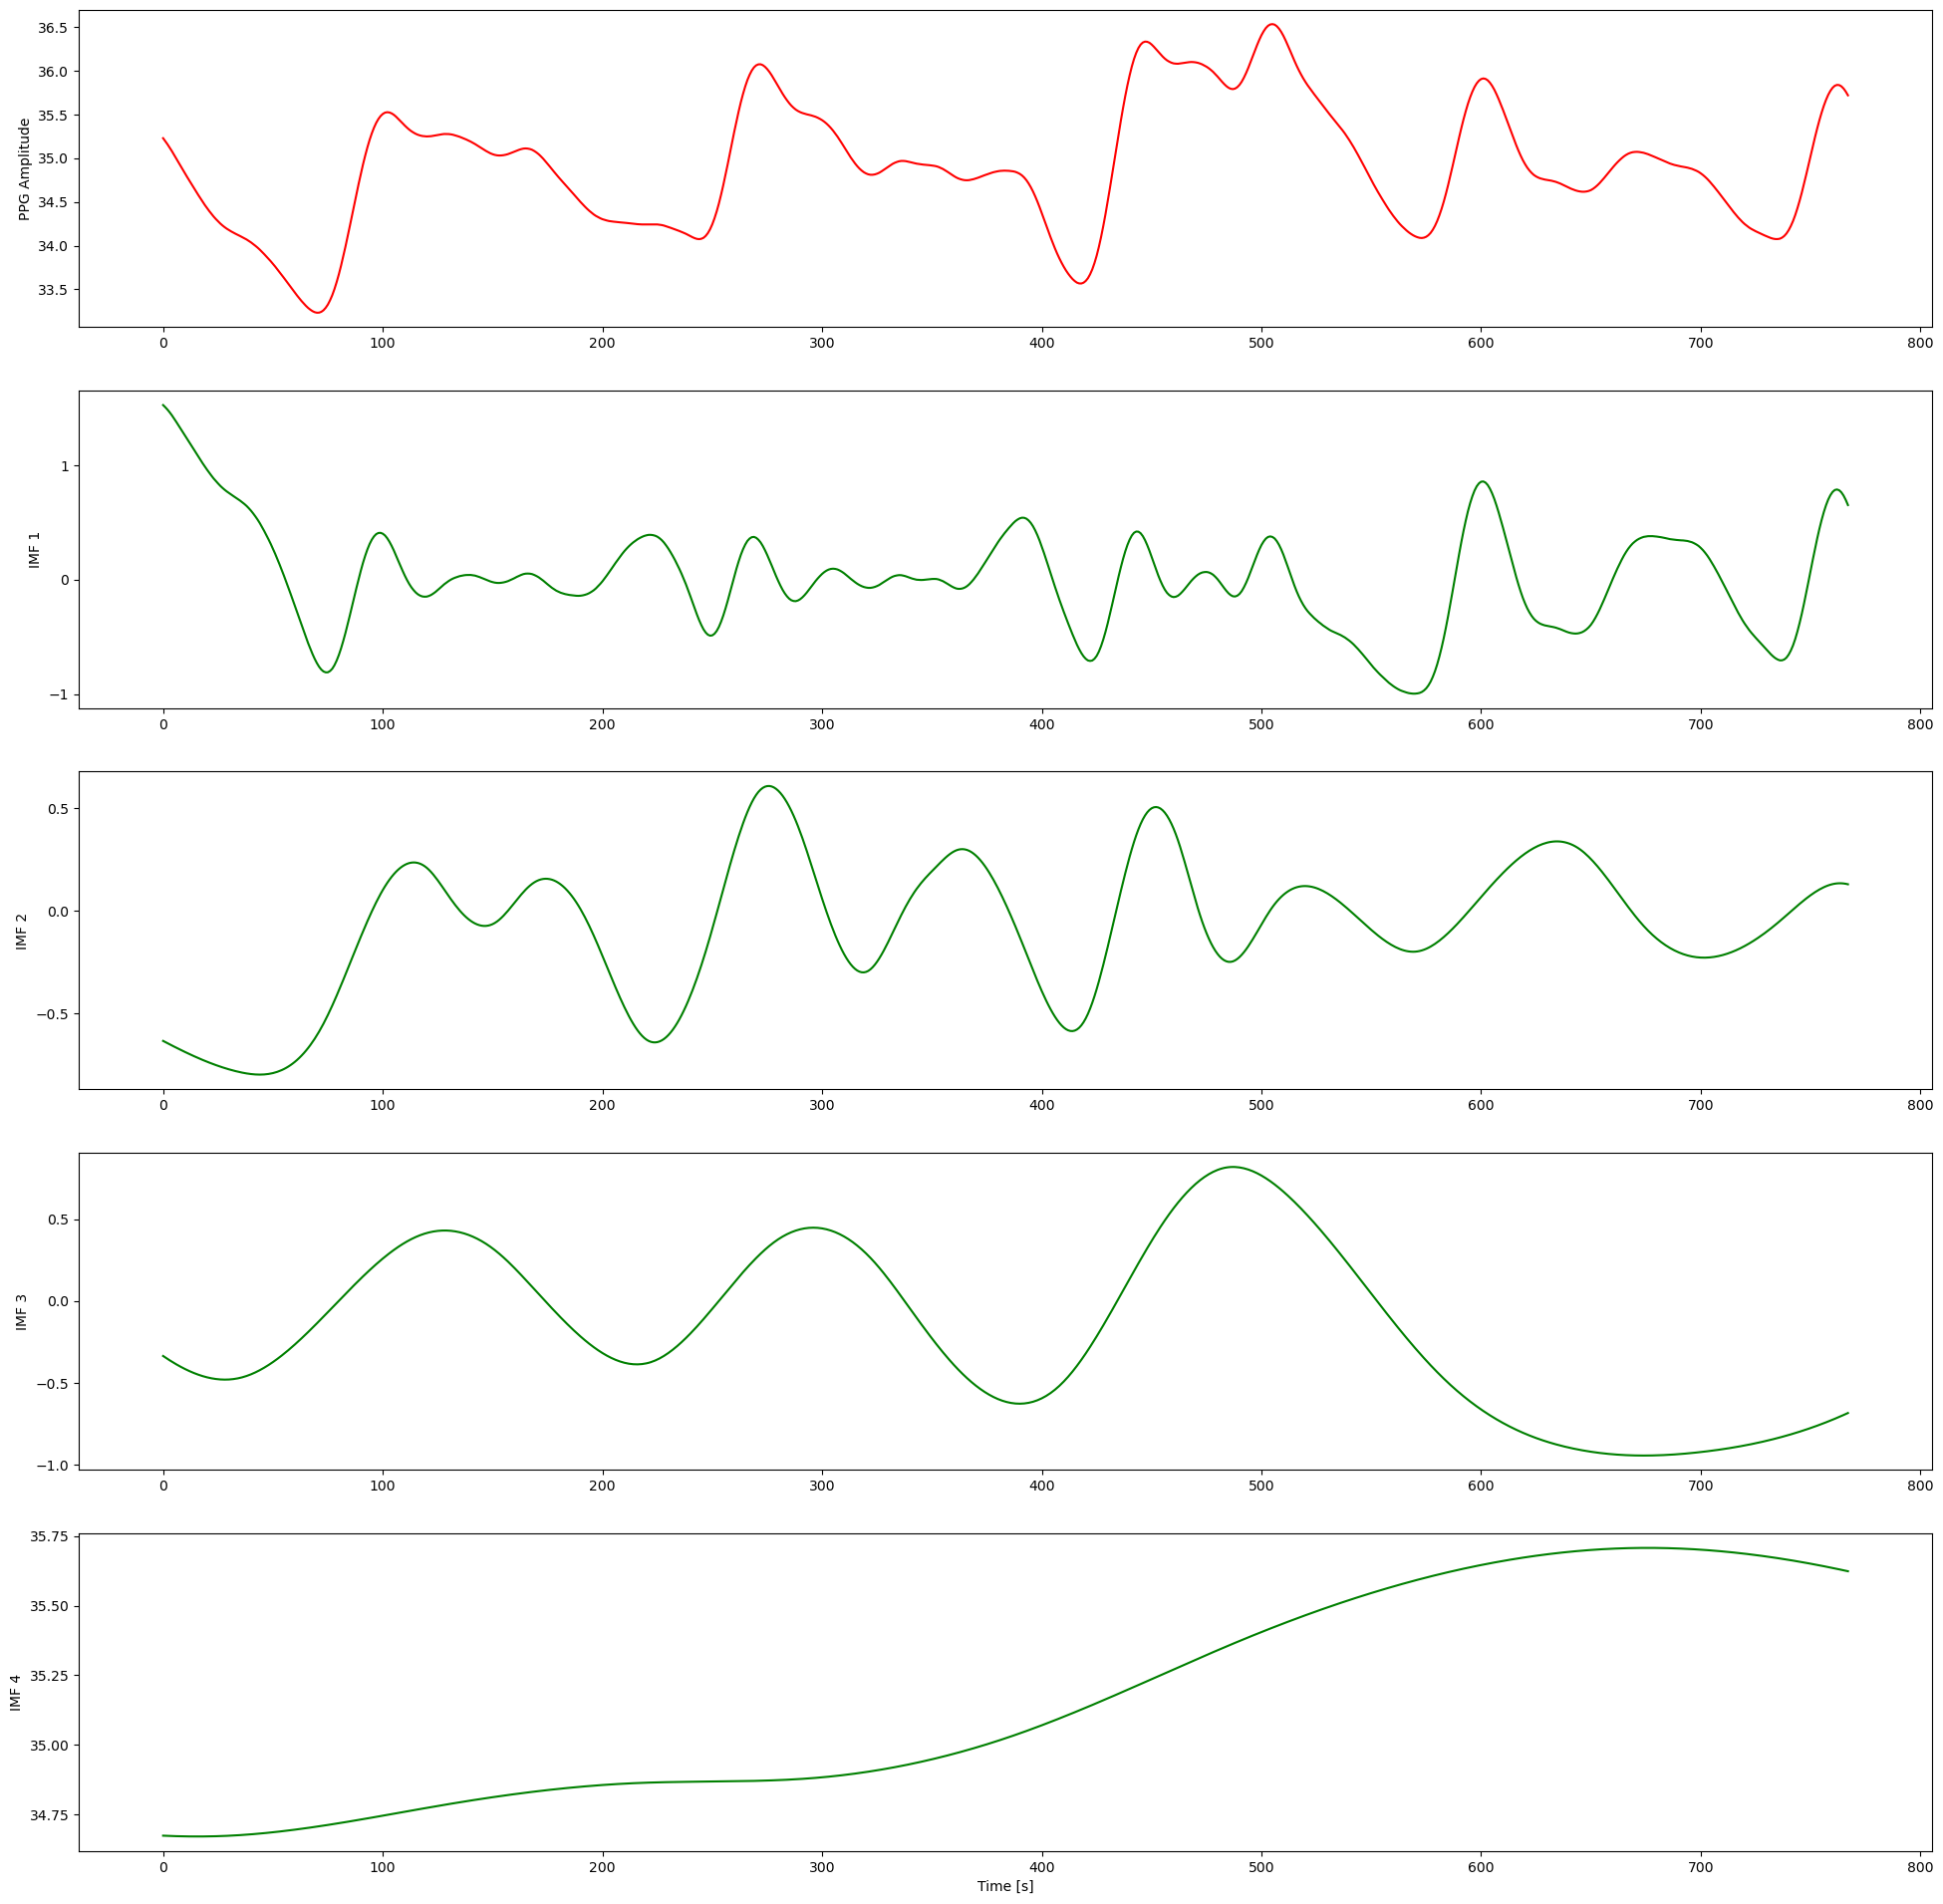

In [45]:
nIMFs = imfs.shape[0]
plt.figure(figsize=(24,24))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(S2, 'r')
plt.ylabel('PPG Amplitude')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(imfs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.show()


In [46]:
ldata = pd.concat(map(pd.read_csv, ["D:\PPG Dataset\Low_MWL\Low_MWL\p2l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p3l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p4l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p5l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p6l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p8l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p10l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p11l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p12l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p13l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p14l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p15l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p16l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p17l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p18l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p19l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p20l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p21l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p22l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p23l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p24l.csv","D:\PPG Dataset\Low_MWL\Low_MWL\p25l.csv"]), ignore_index=True)
hdata=pd.concat(map(pd.read_csv,["D:\PPG Dataset\High_MWL\High_MWL\p2h.csv","D:\PPG Dataset\High_MWL\High_MWL\p3h.csv","D:\PPG Dataset\High_MWL\High_MWL\p4h.csv","D:\PPG Dataset\High_MWL\High_MWL\p5h.csv","D:\PPG Dataset\High_MWL\High_MWL\p6h.csv","D:\PPG Dataset\High_MWL\High_MWL\p8h.csv","D:\PPG Dataset\High_MWL\High_MWL\p10h.csv","D:\PPG Dataset\High_MWL\High_MWL\p11h.csv","D:\PPG Dataset\High_MWL\High_MWL\p12h.csv","D:\PPG Dataset\High_MWL\High_MWL\p13h.csv","D:\PPG Dataset\High_MWL\High_MWL\p14h.csv","D:\PPG Dataset\High_MWL\High_MWL\p15h.csv","D:\PPG Dataset\High_MWL\High_MWL\p16h.csv","D:\PPG Dataset\High_MWL\High_MWL\p17h.csv","D:\PPG Dataset\High_MWL\High_MWL\p18h.csv","D:\PPG Dataset\High_MWL\High_MWL\p19h.csv","D:\PPG Dataset\High_MWL\High_MWL\p20h.csv","D:\PPG Dataset\High_MWL\High_MWL\p21h.csv","D:\PPG Dataset\High_MWL\High_MWL\p22h.csv","D:\PPG Dataset\High_MWL\High_MWL\p23h.csv","D:\PPG Dataset\High_MWL\High_MWL\p24h.csv","D:\PPG Dataset\High_MWL\High_MWL\p25h.csv"]),ignore_index=True)


In [47]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(ldata)
low=pd.DataFrame(X)
low['label']=0
display(low.head())


C:\Users\sonaa\.conda\envs\ppg_project\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\sonaa\.conda\envs\ppg_project\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\sonaa\.conda\envs\ppg_project\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


,0,1,2,3,4,label
0,-1.0543760768,-0.2221835638,NaN,NaN,NaN,0
1,-1.0642474204,-0.2533814428,NaN,NaN,NaN,0
2,-1.0646766092,-0.2845793218,NaN,NaN,NaN,0
3,-1.0548052657,-0.3161721106,NaN,NaN,NaN,0
4,-1.0337750120,-0.3481598093,NaN,NaN,NaN,0


In [48]:
low=low.iloc[: , [0,1,5]]
low

,0,1,label
0,-1.0543760768,-0.2221835638,0
1,-1.0642474204,-0.2533814428,0
2,-1.0646766092,-0.2845793218,0
3,-1.0548052657,-0.3161721106,0
4,-1.0337750120,-0.3481598093,0
...,...,...,...
1689595,0.2894142126,-1.1241576853,0
1689596,0.2434910056,-1.1150747585,0
1689597,0.1975677987,-1.1028325529,0
1689598,0.1525029694,-1.0862463387,0


In [53]:
setnos,f1,f2,f3,f4,labels=[],[],[],[],[],[]
sampling_rate=256    # Hz
i,j,k=0,1,1
count,c=1,0
print("For Low Mental Stress")
while k<3:
    print("\n\n\nColumn",k)
    while j<2201:
        while i<768*j:
            set=low.iloc[i:i+768,k]
            i=i+768

        signal=set.values
        time=np.arange(len(set))/sampling_rate

    # Plotting Counter
    # c=c+1
    # print("\nPlot",c)

    # Compute IMFs with EMD
        config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
        emd = EMD(**config)
        imfs = emd(signal, max_imf=10)
        print('imfs = ' + f'{imfs.shape[0]:4d}')

    # Grouping Counter
        print("\nSet",count,"captured")
        setnos.append(count)
        count=count+1

        labels.append(0)
        f1.append(np.mean(imfs[0]))
        f2.append(np.min(imfs[0]))
        f3.append(np.max(imfs[0]))
        f4.append(skew(imfs[0]))
    
        j=j+1
    k=k+1
    j=1


For Low Mental Stress



Column 1
imfs =    5

Set 1 captured
imfs =    4

Set 2 captured
imfs =    4

Set 3 captured
imfs =    3

Set 4 captured
imfs =    4

Set 5 captured
imfs =    4

Set 6 captured
imfs =    3

Set 7 captured
imfs =    3

Set 8 captured
imfs =    3

Set 9 captured
imfs =    4

Set 10 captured
imfs =    3

Set 11 captured
imfs =    4

Set 12 captured
imfs =    3

Set 13 captured
imfs =    3

Set 14 captured
imfs =    4

Set 15 captured
imfs =    3

Set 16 captured
imfs =    4

Set 17 captured
imfs =    3

Set 18 captured
imfs =    4

Set 19 captured
imfs =    3

Set 20 captured
imfs =    3

Set 21 captured
imfs =    3

Set 22 captured
imfs =    3

Set 23 captured
imfs =    3

Set 24 captured
imfs =    4

Set 25 captured
imfs =    3

Set 26 captured
imfs =    4

Set 27 captured
imfs =    3

Set 28 captured
imfs =    3

Set 29 captured
imfs =    4

Set 30 captured
imfs =    3

Set 31 captured
imfs =    4

Set 32 captured
imfs =    4

Set 33 captured
imfs =    3

Set 3

In [54]:
df_imf_low=pd.DataFrame(zip(setnos,f1,f2,f3,f4,labels),columns=['Set_no','Imf_1_MEAN','Imf_1_MIN','Imf_1_MAX','Imf_1_SKEWNESS','Label'])
df_imf_low


,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Label
0,1,-0.0198326105,-0.7594529309,0.6697366253,-0.2912653509,0
1,2,-0.0005230175,-0.4835448614,0.3728084870,-0.0955087573,0
2,3,-0.0029941587,-0.5157154557,0.4770358602,-0.1353516691,0
3,4,-0.0648261433,-1.1252797775,0.7639616153,-0.3307660554,0
4,5,-0.0484143388,-0.6661204635,0.5169380344,-0.0067081457,0
...,...,...,...,...,...,...
4395,4396,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
4396,4397,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
4397,4398,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
4398,4399,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0


In [57]:
# Pre-processing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(hdata)

high=pd.DataFrame(X)
high['Label']=1
display(high.head())

,0,1,Label
0,-0.0410219088,0.3144300978,1
1,-0.0588761452,0.2972371507,1
2,-0.0777806308,0.2824321130,1
3,-0.0977353655,0.2700149846,1
4,-0.1187403495,0.2595081836,1


In [58]:
setnos2,f1,f2,f3,f4,labels2=[],[],[],[],[],[]
sampling_rate=256    # Hz
i,j,k=0,1,1
count,c=4401,0
print("For High Mental Stress")
while k<3:
  print("\n\n\nColumn",k)
  while j<2201:
    while i<768*j:
      set=high.iloc[i:i+768,k]
      i=i+768

    signal=set.values
    time=np.arange(len(set))/sampling_rate

    # Plotting Counter
    # c=c+1
    # print("\nPlot",c)

    # Compute IMFs with EMD
    config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
    emd = EMD(**config)
    imfs = emd(signal, max_imf=10)
    print('imfs = ' + f'{imfs.shape[0]:4d}')

    # Grouping Counter
    print("\nSet",count,"captured")
    setnos2.append(count)
    count=count+1

    labels2.append(1)
    f1.append(np.mean(imfs[0]))
    f2.append(np.min(imfs[0]))
    f3.append(np.max(imfs[0]))
    f4.append(skew(imfs[0]))
    
    j=j+1
  k=k+1
  j=1


For High Mental Stress



Column 1
imfs =    3

Set 4401 captured
imfs =    5

Set 4402 captured
imfs =    4

Set 4403 captured
imfs =    4

Set 4404 captured
imfs =    4

Set 4405 captured
imfs =    4

Set 4406 captured
imfs =    4

Set 4407 captured
imfs =    3

Set 4408 captured
imfs =    4

Set 4409 captured
imfs =    4

Set 4410 captured
imfs =    5

Set 4411 captured
imfs =    5

Set 4412 captured
imfs =    3

Set 4413 captured
imfs =    5

Set 4414 captured
imfs =    4

Set 4415 captured
imfs =    3

Set 4416 captured
imfs =    4

Set 4417 captured
imfs =    5

Set 4418 captured
imfs =    5

Set 4419 captured
imfs =    4

Set 4420 captured
imfs =    5

Set 4421 captured
imfs =    4

Set 4422 captured
imfs =    5

Set 4423 captured
imfs =    3

Set 4424 captured
imfs =    5

Set 4425 captured
imfs =    4

Set 4426 captured
imfs =    4

Set 4427 captured
imfs =    4

Set 4428 captured
imfs =    4

Set 4429 captured
imfs =    4

Set 4430 captured
imfs =    4

Set 4431 captured
imfs

In [59]:
# Collecting HIGH data into another dataframe
df_imf_high=pd.DataFrame(zip(setnos2,f1,f2,f3,f4,labels2),columns=['Set_no','Imf_1_MEAN','Imf_1_MIN','Imf_1_MAX','Imf_1_SKEWNESS','Label'])
df_imf_high


,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Label
0,4401,0.0400933762,-0.6474982183,0.6861183371,0.0290751371,1
1,4402,0.0735113219,-1.3889926557,1.7147384748,0.5193025970,1
2,4403,-0.0102569301,-0.9489749984,0.9242902656,-0.0150194684,1
3,4404,-0.0180211646,-0.5032843647,0.4590443145,-0.0476697552,1
4,4405,-0.0546743739,-0.6119352312,0.7499802320,0.2558051349,1
...,...,...,...,...,...,...
4395,8796,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,1
4396,8797,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,1
4397,8798,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,1
4398,8799,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,1


In [60]:
# saving dataframes as csv files for later use
df_imf_low.to_csv('Imf_low.csv', index = True)
df_imf_high.to_csv('Imf_high.csv', index = True)
# csv files will get saved in the kaggles's output directory


In [61]:
# merging two csv files of whole featured data
data = pd.concat(
    map(pd.read_csv, [r"C:\Users\sonaa\Imf_high.csv", r"C:\Users\sonaa\Imf_low.csv"]), ignore_index=True)

final_data=data.drop(['Unnamed: 0'], axis=1)
display(final_data)

,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Label
0,4401,0.0400933762,-0.6474982183,0.6861183371,0.0290751371,1
1,4402,0.0735113219,-1.3889926557,1.7147384748,0.5193025970,1
2,4403,-0.0102569301,-0.9489749984,0.9242902656,-0.0150194684,1
3,4404,-0.0180211646,-0.5032843647,0.4590443145,-0.0476697552,1
4,4405,-0.0546743739,-0.6119352312,0.7499802320,0.2558051349,1
...,...,...,...,...,...,...
8795,4396,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8796,4397,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8797,4398,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8798,4399,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0


In [62]:
len(imfs[0])

768

In [63]:
# rows in final data
len(final_data)

8800

In [64]:
# saving final dataframe as csv file to use later
final_data.to_csv('final_data.csv', index = True)


In [65]:
# saving final dataframe as csv file to use later
final_data.to_csv('final_data.csv', index = True)

In [66]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# From the second dataset mentioned above, we will load the similar type of featured dataframe, we generated in the end of part-1
df=pd.read_csv(r"C:\Users\sonaa\final_data.csv")
df

,Unnamed: 0,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Label
0,0,4401,0.0400933762,-0.6474982183,0.6861183371,0.0290751371,1
1,1,4402,0.0735113219,-1.3889926557,1.7147384748,0.5193025970,1
2,2,4403,-0.0102569301,-0.9489749984,0.9242902656,-0.0150194684,1
3,3,4404,-0.0180211646,-0.5032843647,0.4590443145,-0.0476697552,1
4,4,4405,-0.0546743739,-0.6119352312,0.7499802320,0.2558051349,1
...,...,...,...,...,...,...,...
8795,8795,4396,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8796,8796,4397,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8797,8797,4398,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8798,8798,4399,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0


In [67]:
df0=df[df.Label==0]
df0.head()

,Unnamed: 0,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Label
4400,4400,1,-0.0198326105,-0.7594529309,0.6697366253,-0.2912653509,0
4401,4401,2,-0.0005230175,-0.4835448614,0.3728084870,-0.0955087573,0
4402,4402,3,-0.0029941587,-0.5157154557,0.4770358602,-0.1353516691,0
4403,4403,4,-0.0648261433,-1.1252797775,0.7639616153,-0.3307660554,0
4404,4404,5,-0.0484143388,-0.6661204635,0.5169380344,-0.0067081457,0


In [68]:
df1=df[df.Label==1]
df1.head()

,Unnamed: 0,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Label
0,0,4401,0.0400933762,-0.6474982183,0.6861183371,0.0290751371,1
1,1,4402,0.0735113219,-1.3889926557,1.7147384748,0.5193025970,1
2,2,4403,-0.0102569301,-0.9489749984,0.9242902656,-0.0150194684,1
3,3,4404,-0.0180211646,-0.5032843647,0.4590443145,-0.0476697552,1
4,4,4405,-0.0546743739,-0.6119352312,0.7499802320,0.2558051349,1


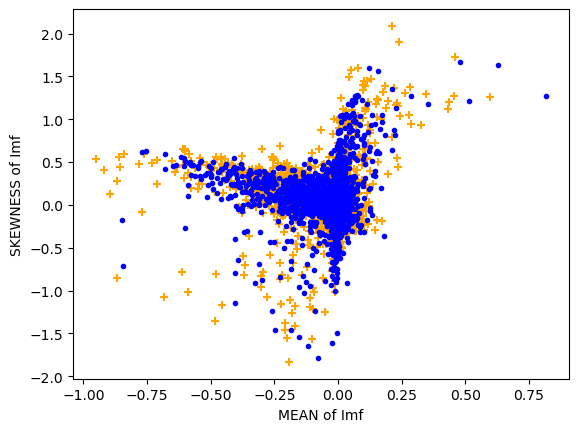

In [69]:
import matplotlib.pyplot as plt
plt.xlabel('MEAN of Imf')
plt.ylabel('SKEWNESS of Imf')
plt.scatter(df0['Imf_1_MEAN'], df0['Imf_1_SKEWNESS'],color="orange",marker='+')
plt.scatter(df1['Imf_1_MEAN'], df1['Imf_1_SKEWNESS'],color="blue",marker='.')


In [70]:
# independent variables
x=df.iloc[:,1:9]
display(x)

,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Label
0,4401,0.0400933762,-0.6474982183,0.6861183371,0.0290751371,1
1,4402,0.0735113219,-1.3889926557,1.7147384748,0.5193025970,1
2,4403,-0.0102569301,-0.9489749984,0.9242902656,-0.0150194684,1
3,4404,-0.0180211646,-0.5032843647,0.4590443145,-0.0476697552,1
4,4405,-0.0546743739,-0.6119352312,0.7499802320,0.2558051349,1
...,...,...,...,...,...,...
8795,4396,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8796,4397,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8797,4398,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0
8798,4399,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,0


In [71]:
# dependent variables
y=df.iloc[:,-1]
y


0       1
1       1
2       1
3       1
4       1
       ..
8795    0
8796    0
8797    0
8798    0
8799    0
Name: Label, Length: 8800, dtype: int64

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load and clean the data
df = pd.read_csv("final_data.csv")
df.columns = df.columns.str.strip()  # just in case of spaces

# Select features and labels
features = df[['Imf_1_MEAN', 'Imf_1_MIN', 'Imf_1_MAX', 'Imf_1_SKEWNESS']]
labels = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "clean_mwl_classifier.joblib")
print("✅ Model trained and saved as clean_mwl_classifier.joblib")


✅ Model trained and saved as clean_mwl_classifier.joblib


RandomForestClassifier(n_estimators=1000)

In [9]:
plt.plot(x.iloc[0])
plt.plot(x.iloc[4400])

NameError: name 'plt' is not defined

In [89]:
y_pred = classifier.predict(X_test)
y_pred


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy :  100.0


In [91]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", conf)

Confusion Matrix : 
 [[1335    0]
 [   0 1305]]


In [92]:
rec = conf[0][0]/(conf[0][0]+conf[1][0])
print("Recall : \n",rec)


Recall : 
 1.0


In [93]:
prec = conf[0][0]/(conf[0][0]+conf[0][1])
print("Precision:\n",prec)


Precision:
 1.0


In [94]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [95]:
model.score(X_test, y_test)

0.9992424242424243

In [96]:
model_kernal = SVC(kernel='sigmoid')
model_kernal.fit(X_train, y_train)

model_kernal.score(X_test, y_test)*100

40.15151515151515

In [97]:
model_C = SVC(C=200)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)*100


100.0

In [98]:
y_prd = model_C.predict(X_test)
y_prd


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prd)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[1335    0]
 [   0 1305]]


In [100]:
prec = cm[0][0]/(cm[0][0]+cm[0][1])
print("Precision:\n",prec)

Precision:
 1.0


In [101]:
rec = cm[0][0]/(cm[0][0]+cm[1][0])
print("Recall : \n",rec)


Recall : 
 1.0


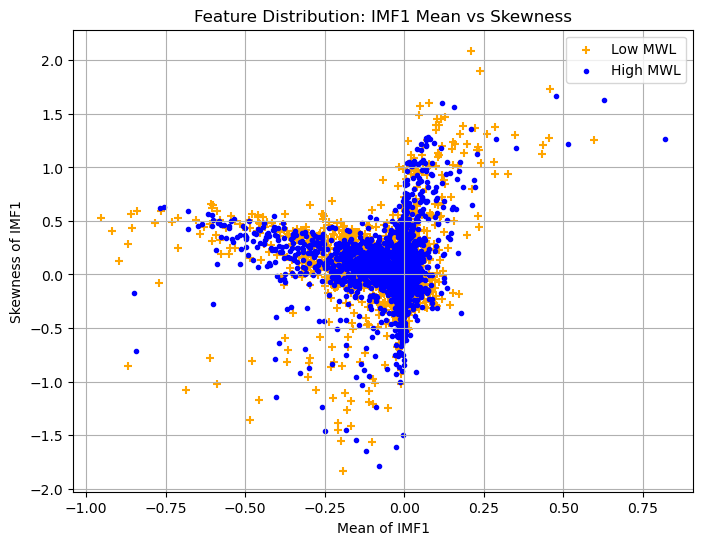


🎯 Random Forest Classifier
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1320
           1       1.00      1.00      1.00      1320

    accuracy                           1.00      2640
   macro avg       1.00      1.00      1.00      2640
weighted avg       1.00      1.00      1.00      2640



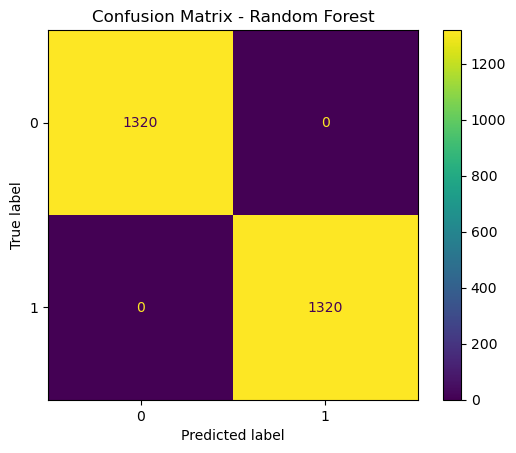


🎯 SVM (RBF Kernel)
Accuracy: 99.96212121212122
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1320
           1       1.00      1.00      1.00      1320

    accuracy                           1.00      2640
   macro avg       1.00      1.00      1.00      2640
weighted avg       1.00      1.00      1.00      2640



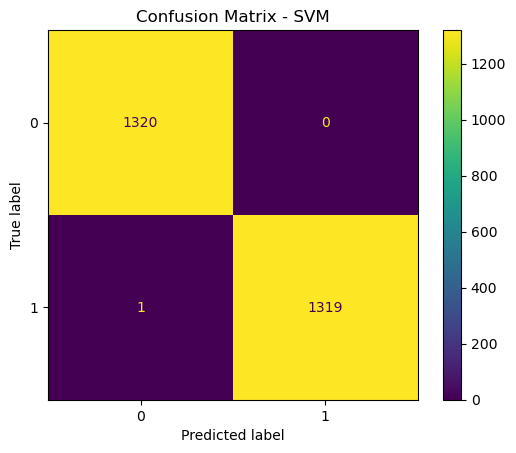


🔄 Cross-validation (Random Forest, 5 folds):
CV Scores: [100. 100. 100. 100. 100.]
Mean Accuracy: 100.00%


In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import joblib

# Step 1: Load and clean the dataset
df = pd.read_csv("final_data.csv")
df = df.drop(columns=["Unnamed: 0"], errors='ignore')  # remove index col if exists

# Step 2: Select only relevant features
features = df[['Imf_1_MEAN', 'Imf_1_MIN', 'Imf_1_MAX', 'Imf_1_SKEWNESS']]
labels = df['Label']

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Step 4: Train the RandomForest classifier
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print("✅ Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🎯 Precision:", precision_score(y_test, y_pred))
print("📈 Recall:", recall_score(y_test, y_pred))

# Step 6: Save the model
joblib.dump(model, "clean_mwl_classifier.joblib")
print("✅ Model saved as 'clean_mwl_classifier.joblib'")


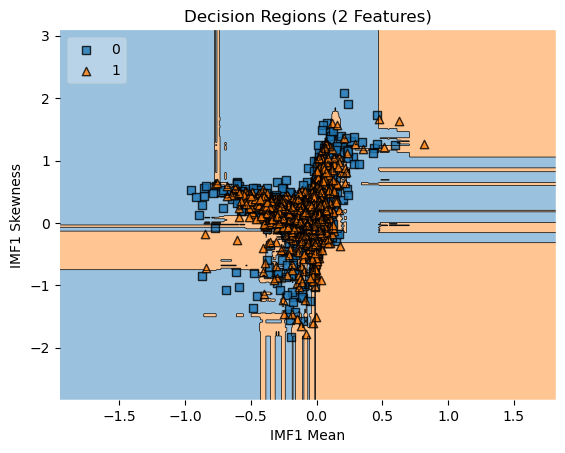

In [104]:
from mlxtend.plotting import plot_decision_regions

X_small = X[['Imf_1_MEAN', 'Imf_1_SKEWNESS']].values
y_small = y.values
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_small, y_small)

plot_decision_regions(X_small, y_small, clf=clf, legend=2)
plt.xlabel("IMF1 Mean")
plt.ylabel("IMF1 Skewness")
plt.title("Decision Regions (2 Features)")
plt.show()


In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x, y, cv=5)
print("Cross-validation accuracy:", np.mean(scores)*100)


Cross-validation accuracy: 100.0


In [111]:
import joblib

# Save the trained model to a file
joblib.dump(classifier, 'mwl_classifier.joblib')


['mwl_classifier.joblib']

In [112]:
joblib.dump(model_C, 'svm_model_C200.joblib')


['svm_model_C200.joblib']

C:\Users\sonaa\.conda\envs\ppg_project\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Label
- Set_no

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but RandomForestClassifier is expecting 6 features as input.

In [2]:
df = pd.read_csv("final_data.csv")
print(df['Label'].value_counts())


1    4400
0    4400
Name: Label, dtype: int64


In [7]:
import pandas as pd

df = pd.read_csv("final_data.csv")
print("Columns in your dataset:\n", df.columns.tolist())


Columns in your dataset:
 ['Unnamed: 0', 'Set_no', 'Imf_1_MEAN', 'Imf_1_MIN', 'Imf_1_MAX', 'Imf_1_SKEWNESS', 'Label']
